In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from datetime import datetime

ahora = datetime.now().strftime('%Y-%m-%d')

# Descargar los datos de QQQ
data = yf.download("QQQ", start="2023-11-01", end=ahora,interval='1d')

# Obtener los rendimientos diarios
returns = data['Adj Close'].pct_change().dropna()

# Configurar las simulaciones
n_simulations = 10
n_days = len(returns)

# Realizar las simulaciones de bootstrap
bootstrap_samples = np.random.choice(returns, (n_simulations, n_days), replace=True)
bootstrap_cumulated = np.cumprod(1 + bootstrap_samples, axis=1)

# Calcular el precio simulado para cada muestra de bootstrap
simulated_prices = bootstrap_cumulated * data['Adj Close'].iloc[0]

# Crear un DataFrame para las simulaciones
simulated_df = pd.DataFrame(simulated_prices.T)
simulated_df.set_index(data.index[:-1],inplace=True)

# Graficar las simulaciones
fig = go.Figure()

# Agregar líneas para cada simulación
for i in range(n_simulations):
    fig.add_trace(go.Scatter(x=data.index, y=simulated_df[i], mode='lines', line=dict(width=2), opacity=0.3))

# Agregar línea del precio real
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Real', line=dict(color='black', width=2)))

# Configurar el gráfico
fig.update_layout(title='Simulaciones de Bootstrap para BTS-USD',
                  xaxis_title='Fecha',
                  yaxis_title='Precio Ajustado',
                  template='plotly_white')

# Mostrar el gráfico
fig.show()


[*********************100%%**********************]  1 of 1 completed


In [3]:
import yfinance as yf
import numpy as np
import plotly.graph_objects as go


# Calcular los retornos diarios
data['Return'] = data['Close'].pct_change()

# Establecer un umbral para detectar eventos (e.g., 1% de cambio)
threshold = 0.01

eventos_si_no = data['Return'].abs() > threshold

# Crear una serie de eventos basada en el umbral
events = data.index[eventos_si_no]

# Crear una figura de Plotly
fig = go.Figure()

# Agregar la línea del precio de cierre
fig.add_trace(go.Scatter(
    x=data.index, 
    y=data['Close'], 
    mode='lines', 
    name='Close Price',
    line=dict(color='blue')
))

# Agregar los eventos como puntos
fig.add_trace(go.Scatter(
    x=events, 
    y=data.loc[events, 'Close'], 
    mode='markers', 
    name='Events',
    marker=dict(color='red', size=8)
))

# Personalizar el diseño
fig.update_layout(
    title='Precio de Cierre de AAPL con Eventos Detectados',
    xaxis_title='Fecha',
    yaxis_title='Precio de Cierre (USD)',
    legend_title='Leyenda',
    template='plotly_white',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    )
)

# Mostrar la figura
fig.show()


In [154]:
eventos_si_no

Date
2023-11-01    False
2023-11-02     True
2023-11-03     True
2023-11-06    False
2023-11-07    False
              ...  
2024-07-30     True
2024-07-31     True
2024-08-01     True
2024-08-02     True
2024-08-05     True
Name: Return, Length: 190, dtype: bool

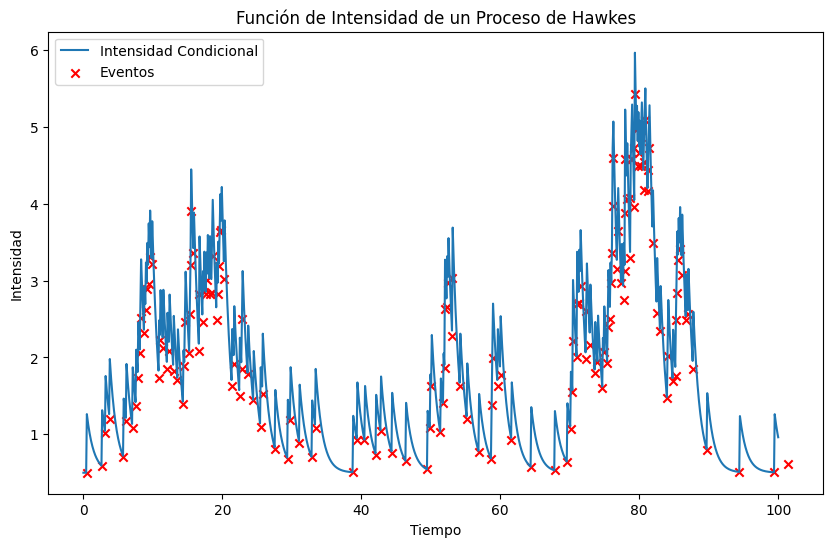

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del proceso Hawkes
nu = 0.5  # Tasa base
alpha = 0.8  # Amplitud del kernel
beta = 1.0  # Tasa de decaimiento del kernel

# Función de kernel exponencial
def exponential_kernel(t, alpha, beta):
    return alpha * np.exp(-beta * t)

# Función de intensidad condicional
def hawkes_intensity(t, events, nu, alpha, beta):
    intensity = nu
    for ti in events:
        if ti < t:
            intensity += exponential_kernel(t - ti, alpha, beta)
    return intensity

# Simulación de un proceso de Hawkes
def simulate_hawkes(nu, alpha, beta, T, max_events=1000):
    events = []
    t = 0
    while t < T and len(events) < max_events:
        # Calculamos la tasa de intensidad actual
        lambda_t = hawkes_intensity(t, events, nu, alpha, beta)
        
        # Generamos el próximo tiempo de evento
        t += np.random.exponential(scale=1/lambda_t)
        
        # Aceptamos el evento con una probabilidad
        if np.random.rand() < lambda_t / (nu + alpha):
            events.append(t)
    
    return np.array(events)

# Parámetros de simulación
T = 100  # Tiempo total de simulación

# Simulamos el proceso
events = simulate_hawkes(nu, alpha, beta, T)

# Graficamos la función de intensidad a lo largo del tiempo
time_grid = np.linspace(0, T, 1000)
intensity_values = [hawkes_intensity(t, events, nu, alpha, beta) for t in time_grid]

plt.figure(figsize=(10, 6))
plt.plot(time_grid, intensity_values, label='Intensidad Condicional')
plt.scatter(events, [hawkes_intensity(t, events, nu, alpha, beta) for t in events], color='red', marker='x', label='Eventos')
plt.title('Función de Intensidad de un Proceso de Hawkes')
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.legend()
plt.show()


In [5]:
import numpy as np

# Parámetros del proceso Hawkes
nu = 0.5  # Tasa base
alpha = 0.8  # Amplitud del kernel
beta = 1.5  # Tasa de decaimiento del kernel

# Parámetros
#n = 100  # Tamaño de la lista
#p = 0.5  # Probabilidad de obtener 1

# Generar una lista de números aleatorios con distribución de Bernoulli
#random_list = np.random.binomial(n=1, p=p, size=n)

random_list = eventos_si_no

# Calcular los tiempos de eventos
tiempos = np.arange(1, len(random_list) + 1)

# Calcular la intensidad usando operaciones vectorizadas
lambda_0 = nu + alpha* np.sum(random_list * np.exp(-beta * (len(random_list) + 1 - tiempos)))

# Escalar la intensidad por alpha


print("Random List:")
print(random_list)
print("\nIntensidad calculada:")
print(lambda_0)


Random List:
Date
2023-11-01    False
2023-11-02     True
2023-11-03     True
2023-11-06    False
2023-11-07    False
              ...  
2024-07-30     True
2024-07-31     True
2024-08-01     True
2024-08-02     True
2024-08-05     True
Name: Return, Length: 190, dtype: bool

Intensidad calculada:
0.7296745457909867


In [6]:
def funcion_intensidad(mu,alpha,beta,eventos,tiempos):
    return mu + alpha* np.sum(eventos * np.exp(-beta * (len(eventos) + 1 - tiempos)))



In [7]:
eventos = [1,2,3]


number_events = len(eventos)
    
times = np.linspace(0, num_days, num_days + 1) + number_events
times

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103.])

In [8]:
import numpy as np

number_events = 4
num_days = 5

# Create an array of times from 0 to num_days
times = np.linspace(1, num_days, num_days) + number_events

# Create another array using linspace
historical_times = np.linspace(1, num_days-1, num_days -1)

# Correctly concatenate the two arrays by wrapping them in a tuple or list
tiempos_historicos = np.concatenate((historical_times, times))

# Print the resulting array
print(times)
print(historical_times)
print(tiempos_historicos)


[5. 6. 7. 8. 9.]
[1. 2. 3. 4.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [18]:
eventos_si_no

Date
2023-11-01    False
2023-11-02     True
2023-11-03     True
2023-11-06    False
2023-11-07    False
              ...  
2024-07-30     True
2024-07-31     True
2024-08-01     True
2024-08-02     True
2024-08-05     True
Name: Return, Length: 190, dtype: bool

[191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204.
 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218.
 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231. 232.
 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244. 245. 246.
 247. 248. 249. 250. 251. 252. 253. 254. 255. 256. 257. 258. 259. 260.
 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271. 272. 273. 274.
 275. 276. 277. 278. 279. 280. 281. 282. 283. 284. 285. 286. 287. 288.
 289. 290.]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.

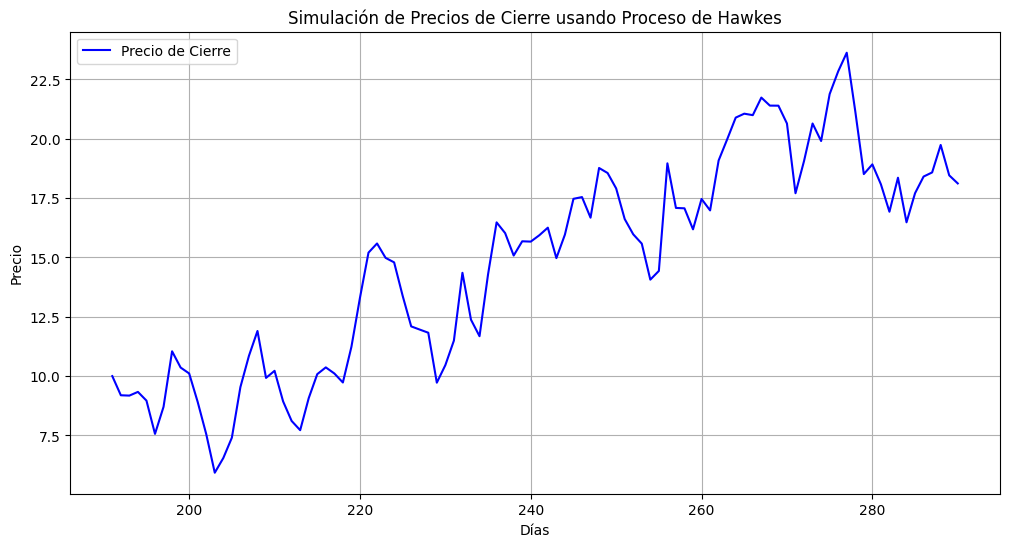

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 


def funcion_intensidad(mu,alpha,beta,eventos,tiempos):
    return mu + alpha* np.sum(eventos * np.exp(-beta * (len(eventos) + 1 - tiempos)))



# Parámetros del proceso Hawkes
nu = 0.5  # Tasa base
alpha = 0.8  # Amplitud del kernel
beta = 1.0  # Tasa de decaimiento del kernel

def simulated_hawkes_closing_prices(eventos, lambda_0, alpha, beta, initial_price, daily_volatility, num_days=30):
    
    number_events = len(eventos)
    
    eventos_historicos = eventos
    
    # Create an array of times from 0 to num_days
    times = np.linspace(1, num_days, num_days) + number_events

    # Create another array using linspace
    historical_times = np.linspace(1, number_events, number_events )

    # Correctly concatenate the two arrays by wrapping them in a tuple or list
    #tiempos_historicos = np.concatenate((historical_times, times))

    # List to store closing prices
    prices = [initial_price] 
    
    # List to store event times for plotting
    np.insert(times,0,number_events)
    print(times)
    print(historical_times)    
    current_intensity = lambda_0  # Current intensity
    
    
    #last_event_times = eventos  # Last event times (list of all previous eventos)
    
    for i in range(1,num_days):
        np.append(historical_times,times[i])
        
        P = 1 - np.exp(-current_intensity)
        
        price_change = 0  # Initialize price change for the day
        
        if np.random.uniform() < P: 
            np.append(eventos_historicos,1)
            # Calculate price change based on the number of eventos

            event_price_change = np.random.normal(loc=0, scale=daily_volatility)
            price_change += event_price_change
        else:
            np.append(eventos_historicos,0)
        #print(i)
        #print(eventos_historicos)
        #print(historical_times)
        current_intensity = funcion_intensidad(lambda_0,alpha,beta,eventos_historicos,historical_times)
        
        price_change += np.random.normal(loc=0, scale=daily_volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)
        
    return times, prices
        
# Parámetros del modelo
lambda_0 = 0.5  # Intensidad base
alpha = 0.8     # Impacto de los eventos
beta = 1.5      # Tasa de decaimiento
#T = 100         # Total de días a simular
initial_price = 10  # Precio inicial
daily_volatility = 1 # Volatilidad diaria
num_days = 100  # Número de días

# Initialize events list (if not used, this can be an empty list)
events = eventos_si_no

# Simulación

times, prices = simulated_hawkes_closing_prices(events, lambda_0 , alpha, beta, initial_price, daily_volatility, num_days)

# Visualización de la serie temporal de precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(times, prices, label='Precio de Cierre', color='blue')

# Correct the indexing of event times to align with the time series
plt.scatter(event_times, [prices[int((t / max(times)) * num_days)] for t in event_times], color='red', label='Eventos', marker='x')

plt.xlabel('Días')
plt.ylabel('Precio')
plt.title('Simulación de Precios de Cierre usando Proceso de Hawkes')
plt.legend()
plt.grid(True)
plt.show()


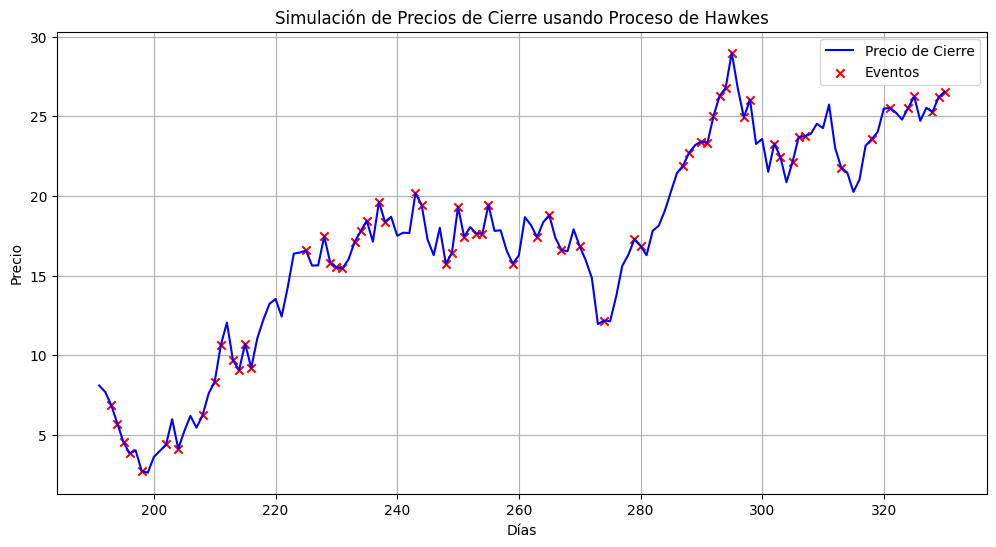

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def funcion_intensidad(mu, alpha, beta, eventos, tiempos):
    # Calculate the current intensity of the Hawkes process
    return mu + alpha * np.sum(eventos * np.exp(-beta * (len(eventos) + 1 - tiempos)))

def simulated_hawkes_closing_prices(eventos, lambda_0, alpha, beta, initial_price, daily_volatility, num_days=30):
    number_events = len(eventos)
    
    eventos_historicos = list(eventos)  # Convert to list for modifiability

    # Create an array of times for historical events
    historical_times = np.arange(1, number_events + 1)

    # List to store closing prices
    prices = [initial_price]

    current_intensity = lambda_0  # Current intensity
    
    simulated_events = np.zeros(1)
    
    for i in range(1, num_days + 1):
        # Update the historical times by adding the new time
        historical_times = np.append(historical_times, number_events + i)

        P = 1 - np.exp(-current_intensity)
        
        price_change = 0  # Initialize price change for the day
        
        if np.random.uniform() < P:
            eventos_historicos.append(1)
            # Calculate price change based on the number of events
            event_price_change = np.random.normal(loc=0, scale=daily_volatility)
            price_change += event_price_change
            simulated_events = np.append(simulated_events,1)
        else:
            simulated_events = np.append(simulated_events,0)
            eventos_historicos.append(0)

        # Update the current intensity of the Hawkes process
        current_intensity = funcion_intensidad(lambda_0, alpha, beta, eventos_historicos, historical_times)
        
        price_change += np.random.normal(loc=0, scale=daily_volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)

    # Times from 1 to num_days to match prices length
    times = np.arange(1, num_days + 1) + number_events

    return times, prices, simulated_events

# Model parameters
lambda_0 = 0.5  # Base intensity
alpha = 0.8     # Event impact
beta = 1.5      # Decay rate
initial_price = 10  # Initial price
daily_volatility = 1  # Daily volatility
num_days = 140  # Number of days

# Initialize the events list
events = eventos_si_no

# Simulation
times, prices, simulated_events = simulated_hawkes_closing_prices(events, lambda_0, alpha, beta, initial_price, daily_volatility, num_days)

# Visualization of the closing prices time series
plt.figure(figsize=(12, 6))
plt.plot(times, prices[1:], label='Precio de Cierre', color='blue')  # Skip the initial price to match the time series length

# Identify the times of events (where the events are 1)
event_times = [i + 1 for i, e in enumerate(simulated_events) if e == 1 and i < num_days]  # Adjust index to match times

# Correctly align the event times with the time series
plt.scatter(np.array(event_times)+190, [prices[i] for i in event_times], color='red', label='Eventos', marker='x')

plt.xlabel('Días')
plt.ylabel('Precio')
plt.title('Simulación de Precios de Cierre usando Proceso de Hawkes')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

def funcion_intensidad(mu, alpha, beta, eventos, tiempos):
    # Calculate the current intensity of the Hawkes process
    return mu + alpha * np.sum(eventos * np.exp(-beta * (len(eventos) + 1 - tiempos)))

def simulated_hawkes_closing_prices(eventos, lambda_0, alpha, beta, initial_price, daily_volatility, num_days=30):
    number_events = len(eventos)
    
    eventos_historicos = list(eventos)  # Convert to list for modifiability

    # Create an array of times for historical events
    historical_times = np.arange(1, number_events + 1)

    # List to store closing prices
    prices = [initial_price]

    current_intensity = lambda_0  # Current intensity
    
    simulated_events = np.zeros(1)
    
    for i in range(1, num_days + 1):
        # Update the historical times by adding the new time
        historical_times = np.append(historical_times, number_events + i)

        P = 1 - np.exp(-current_intensity)
        
        price_change = 0  # Initialize price change for the day
        
        if np.random.uniform() < P:
            eventos_historicos.append(1)
            # Calculate price change based on the number of events
            event_price_change = np.random.normal(loc=0, scale=daily_volatility)
            price_change += event_price_change
            simulated_events = np.append(simulated_events, 1)
        else:
            simulated_events = np.append(simulated_events, 0)
            eventos_historicos.append(0)

        # Update the current intensity of the Hawkes process
        current_intensity = funcion_intensidad(lambda_0, alpha, beta, eventos_historicos, historical_times)
        
        price_change += np.random.normal(loc=0, scale=daily_volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)

    # Times from 1 to num_days to match prices length
    times = np.arange(1, num_days + 1) + number_events

    return times, prices, simulated_events

# Model parameters
lambda_0 = 0.5  # Base intensity
alpha = 0.8     # Event impact
beta = 1.5      # Decay rate
initial_price = 10  # Initial price
daily_volatility = 1  # Daily volatility
num_days = 140  # Number of days

# Initialize the events list
events = eventos_si_no  # Example initialization, replace with your actual 'eventos_si_no'

# Simulation
times, prices, simulated_events = simulated_hawkes_closing_prices(events, lambda_0, alpha, beta, initial_price, daily_volatility, num_days)

# Create Plotly plot
fig = go.Figure()

# Add the closing prices line plot
fig.add_trace(go.Scatter(
    x=times,
    y=prices[1:],  # Skip the initial price to match the time series length
    mode='lines',
    name='Precio de Cierre',
    line=dict(color='blue')
))

# Identify the times of events (where the events are 1)
event_times = [i + 1 for i, e in enumerate(simulated_events) if e == 1 and i < num_days]  # Adjust index to match times

# Add the scatter plot for events
fig.add_trace(go.Scatter(
    x=np.array(event_times) + len(events),
    y=[prices[i] for i in event_times],
    mode='markers',
    name='Eventos',
    marker=dict(color='red', symbol='x')
))

# Update the layout
fig.update_layout(
    title='Simulación de Precios de Cierre usando Proceso de Hawkes',
    xaxis_title='Días',
    yaxis_title='Precio',
    legend=dict(x=0, y=1),
    template='plotly_white'
)

# Show the plot
fig.show()


In [71]:
np.array(event_times) 

array([  2,   4,   7,   8,  10,  11,  12,  14,  15,  18,  20,  22,  24,
        25,  27,  28,  30,  31,  35,  37,  39,  43,  44,  46,  49,  50,
        52,  53,  57,  58,  60,  61,  62,  67,  70,  71,  73,  76,  80,
        90,  95,  96,  97, 101, 102, 103, 105, 106, 109, 110, 111, 119,
       121, 122, 123, 125, 127, 130, 131, 132, 133, 134, 136, 137, 138,
       139, 140])

In [35]:
simulated_events

[False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 Fa

In [22]:
times

array([191., 192., 193., 194., 195., 196., 197., 198., 199., 200., 201.,
       202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212.,
       213., 214., 215., 216., 217., 218., 219., 220., 221., 222., 223.,
       224., 225., 226., 227., 228., 229., 230., 231., 232., 233., 234.,
       235., 236., 237., 238., 239., 240., 241., 242., 243., 244., 245.,
       246., 247., 248., 249., 250., 251., 252., 253., 254., 255., 256.,
       257., 258., 259., 260., 261., 262., 263., 264., 265., 266., 267.,
       268., 269., 270., 271., 272., 273., 274., 275., 276., 277., 278.,
       279., 280., 281., 282., 283., 284., 285., 286., 287., 288., 289.,
       290.])

In [23]:
times
prices

[10,
 8.259550539792063,
 7.591898114551884,
 7.07885476173717,
 7.1146696253018336,
 8.552360283912037,
 7.638848572109711,
 9.317724101624593,
 9.301837573105498,
 9.10490693610293,
 11.429881602284937,
 9.706109860447064,
 9.896927919439964,
 11.41675349573407,
 11.34239542001682,
 10.708450393166368,
 12.522498244401511,
 10.586147650254025,
 7.155968064101885,
 5.790318764245244,
 4.787375542367002,
 5.5947352692894965,
 6.916635413496433,
 5.617073918065022,
 5.256247136069231,
 5.253440870175825,
 4.754556417126071,
 3.5067473771539834,
 5.134298507899628,
 7.525701127042659,
 7.438994838031073,
 6.657575296275006,
 8.796876746611302,
 8.366995831459779,
 10.510738839621238,
 10.561494517623357,
 11.248846797080015,
 11.942699915103718,
 15.433751322889194,
 12.072800318689788,
 14.445413708776789,
 15.657954246307629,
 16.841319481864968,
 17.343965479170254,
 18.629376298948536,
 19.110007159787084,
 20.41343599175987,
 19.302485016101336,
 18.58629241621407,
 19.2846896850113

In [178]:
times

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [163]:
import numpy as np 
import matplotlib.pyplot as plt 

# Parámetros del proceso Hawkes
nu = 0.5  # Tasa base
alpha = 0.8  # Amplitud del kernel
beta = 1.0  # Tasa de decaimiento del kernel

def simulated_hawkes_closing_prices(events,lambda_0,alpha,beta,initial_price,daily_volatility,num_days=30):
    
    number_events = len(events)
    
    times = np.linspace(number_events,number_events+num_days,num_days+1)
    
    # List to store closing prices
    prices = [initial_price] 
    
    # List to store event times for plotting
    event_times = []
    
    current_intensity = lambda_0 # Current_itensity
    last_event_time = 0 # Last event time
    
    for i in range(1,num_days+1):
        current_time = times[i]
        
        # Simulate the number of events in the current day
        P = 1 - np.exp(1)^-current_intensity  
        
        current_intensity = lambda_0 + alpha * np.sum(np.exp(-beta * (current_time - last_event_time)))
        
        price_change = 0  # Initialize price change for the day
        
        if P < np.random.uniform(): 
        # Calculate price change based on the number of events
            event_times.append(current_time)
            event_price_change = np.random.normal(loc=0, scale=daily_volatility)
            price_change += event_price_change
            last_event_time = current_time
            
        # Add a random walk component even for days without events
        price_change += np.random.normal(loc=0, scale=daily_volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)

    return times, prices, event_times

# Parámetros del modelo
lambda_0 = 0.5  # Intensidad base
alpha = 0.8     # Impacto de los eventos
beta = 1.5      # Tasa de decaimiento
T = 100         # Total de días a simular
initial_price = 100  # Precio inicial
daily_volatility = 1 # Volatilidad diaria
num_days = 100  # Número de días

# Simulación
times, prices, event_times = simulated_hawkes_closing_prices(eventos_si_no,lambda_0, alpha, beta, initial_price, daily_volatility, num_days)

# Visualización de la serie temporal de precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(times, prices, label='Precio de Cierre', color='blue')

# Correct the indexing of event times to align with the time series
plt.scatter(event_times, [prices[int((t / T) * num_days)] for t in event_times], color='red', label='Eventos', marker='x')

plt.xlabel('Días')
plt.ylabel('Precio')
plt.title('Simulación de Precios de Cierre usando Proceso de Hawkes')
plt.legend()
plt.grid(True)
plt.show()


TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

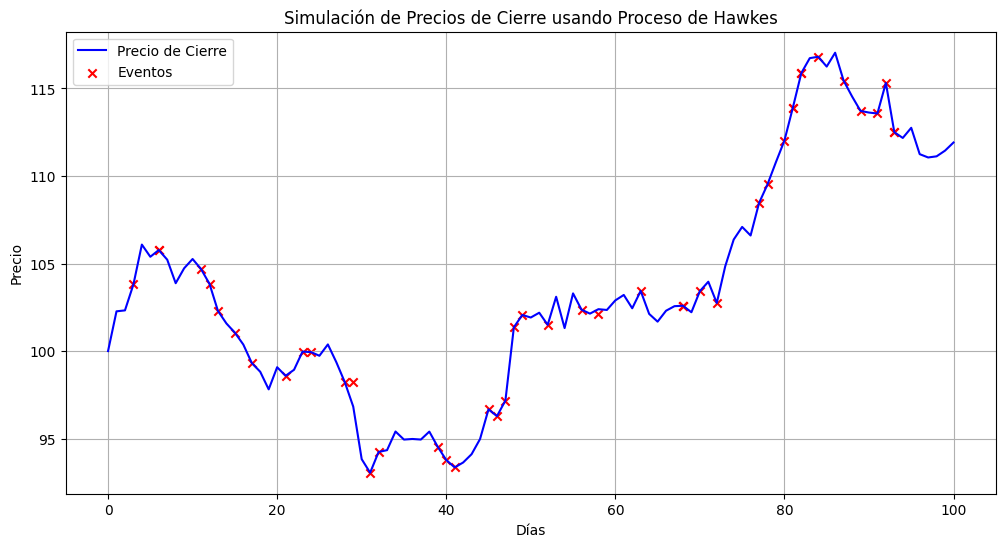

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes_prices(lambda_0, alpha, beta, T, initial_price=100, daily_volatility=1, num_days=100):
    """
    Simulate closing prices of a stock using a Hawkes process.

    :param lambda_0: Baseline intensity of the Hawkes process.
    :param alpha: Impact factor of each event on future intensity.
    :param beta: Decay rate of the impact.
    :param T: Total time to simulate.
    :param initial_price: Starting price of the stock.
    :param daily_volatility: Standard deviation of daily price changes.
    :param num_days: Number of days to simulate.
    :return: Time series of simulated closing prices.
    """
    dt = T / num_days  # Time step size
    times = np.linspace(0, T, num_days + 1)  # Discrete time steps
    prices = [initial_price]  # List to store closing prices
    
    # List to store event times for plotting
    event_times = []

    current_intensity = lambda_0  # Current intensity
    last_event_time = 0  # Last event time

    for i in range(1, num_days + 1):
        current_time = times[i]

        # Simulate the number of events in the current day
        num_events = np.random.poisson(current_intensity * dt)

        # Update intensity based on the number of events
        current_intensity = lambda_0 + alpha * np.sum(np.exp(-beta * (current_time - last_event_time)))

        # Calculate price change based on the number of events
        price_change = 0  # Initialize price change for the day
        for _ in range(num_events):
            event_times.append(current_time)
            event_price_change = np.random.normal(loc=0, scale=daily_volatility)
            price_change += event_price_change
            last_event_time = current_time

        # Add a random walk component even for days without events
        price_change += np.random.normal(loc=0, scale=daily_volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)

    return times, prices, event_times

# Parámetros del modelo
lambda_0 = 0.5  # Intensidad base
alpha = 0.8     # Impacto de los eventos
beta = 1.5      # Tasa de decaimiento
T = 100         # Total de días a simular
initial_price = 100  # Precio inicial
daily_volatility = 1 # Volatilidad diaria
num_days = 100  # Número de días

# Simulación
times, prices, event_times = simulate_hawkes_prices(lambda_0, alpha, beta, T, initial_price, daily_volatility, num_days)

# Visualización de la serie temporal de precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(times, prices, label='Precio de Cierre', color='blue')

# Correct the indexing of event times to align with the time series
plt.scatter(event_times, [prices[int((t / T) * num_days)] for t in event_times], color='red', label='Eventos', marker='x')

plt.xlabel('Días')
plt.ylabel('Precio')
plt.title('Simulación de Precios de Cierre usando Proceso de Hawkes')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
times = np.linspace(0, T, num_days + 1)
times

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])